# 1  Classifying the CIFAR10 Dataset
In this exercise we are going to classify images belonging to 10 different classes,namely airplanes, automobiles, birds, cats, deer, dogs, frogs, horses, ships andtrucks.

## 1 .Start by loading the dataset. 
This is a built-in dataset in keras, see https://keras.io/api/datasets/cifar10/#load_data-functionfor detailed information. Use the following code

In [2]:
import keras

In [3]:
(X_train_full, y_train_full), (X_test, y_test) = \
    keras.datasets.cifar10.load_data()

2. Write code to check shape of the training and the test set. Interpret thisshape, i.e. understand what each number means.

In [4]:
print(X_train_full.shape)
print(y_train_full.shape)

(50000, 32, 32, 3)
(50000, 1)


3. Use the last 10000 examples from the training set as the validation set.The other examples will be used as training set. Write code to create thevalidation and training data.

In [5]:

#? Validatie set: model wordt tussentijds geëvalueerd
#? om te kijken of het niet overfit op de training set.
x_val = X_train_full[-10_000:]
y_val = y_train_full[-10_000:]

#* Hier halen we de validatie set uit de train sets
x_train = X_train_full[:-10_000]
y_train = y_train_full[:-10_000]

In [6]:
x_train.shape

(40000, 32, 32, 3)

In [7]:
x_train.shape[0]

40000

## 1.3  Build a Model

Build a model using the Sequential API. Write a function get_model() that returns a model with the following architecture:
• An Input object that specifies the shape of each image.
• A Rescaling layer which scales the inputs (that are currently between 0 and 255) to the range [0, 1].
- A Conv2 layer with 32 filters, kernel size equal to (3, 3), padding=same and the relu activation function.
- A Conv2 layer with 32 filters, kernel size equal to (3, 3), padding=same and the relu activation function.
- A max pooling layer with pool size equal to (2, 2).
- A Conv2D layer with 64 filters, kernel size equal to (3, 3), padding=same and the relu activation function.
- A Conv2 layer with 64 filters, kernel size equal to (3, 3), padding=same and the relu activation function.
- A max pooling layer with pool size equal to (2, 2).
- A Flatten layer that transforms each example to a long one dimensional tensor.
- A Dense layer with 128 units and the relu activation function.
- A Dense output layer.
  - How many units should this layer have?
  - What is the most appropriate activation function for this layer, given that we are doing classification into 10 classes?

Create an instance of the model and verify that it has 591274 parameters.

In [8]:
def get_model():
    model = keras.Sequential()
    model.add(keras.layers.Input(shape=(32,32,3)))
    model.add(keras.layers.Rescaling(scale=1./255))
    """
    A Conv2Dlayer with 32 filters,
    kernel size equal to(3, 3),
    padding=same and the relu activation function.
    """
    model.add(keras.layers.Conv2D(filters=32,
                                  kernel_size=3,
                                  padding="same",
                                  activation="relu")) #* 3 of (3,3) zie docs.
    model.add(keras.layers.Conv2D(filters=32,
                                  kernel_size=3,
                                  padding="same",
                                  activation="relu"))
    """
    A max pooling layer with pool size equal to (2, 2).
    """
    model.add(keras.layers.MaxPool2D(pool_size=(2, 2))) #* (2,2) mag weg door default, zie docs
    """
    A Con2Dlayer with 64 filters,
    kernel size equal to (3, 3),
    padding=same and the relu activation function
    """
    model.add(keras.layers.Conv2D(filters=64,
                                  kernel_size=3,
                                  padding="same",
                                  activation="relu"))
    model.add(keras.layers.Conv2D(filters=64,
                                  kernel_size=3,
                                  padding="same",
                                  activation="relu"))
    """
    A max pooling layer with pool size equal to (2, 2).
    """
    model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
    """
    A Flatten layer that transforms each example
    to a long one dimensional tensor
    """
    model.add(keras.layers.Flatten())
    """
    A Dense layer with 128 units and
    the relu activation function.
    """
    model.add(keras.layers.Dense(128, activation="relu"))
    """
    A Dense output layer
    """
    model.add(keras.layers.Dense(10, activation="softmax"))
    return model

In [9]:
model = get_model()
model.summary()

2025-10-30 09:19:44.711902: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4
2025-10-30 09:19:44.711930: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-10-30 09:19:44.711935: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-10-30 09:19:44.711963: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-10-30 09:19:44.711972: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 591,274 (2.26 MB)

 Trainable params: 591,274 (2.26 MB)

 Non-trainable params: 0 (0.00 B)

## 1.4  Compile the Model
1. Compile the model.
    * Use the Adam the optimizer with a learning rate of 1/1000.
    * Specify the correct loss function for this classification problem and track the percentage of correctly classified images.

In [10]:
adam_optimizer = keras.optimizers.Adam(learning_rate=1/1000)
#? Hoe weten welke dat we gebruiken van de loss function?
#* Omdat we te maken hebben met een multi-class classificatie probleem
#* en de labels zijn integers (geen one-hot encoding)
#* gebruiken we sparse_categorical_crossentropy
model.compile(optimizer=adam_optimizer,
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [11]:
early_stopping_cb = keras.callbacks.EarlyStopping()

history = model.fit(x=x_train,
                    y=y_train,
                    validation_data=(x_val, y_val),
                    epochs=100,
                    callbacks=[early_stopping_cb],
                    batch_size=64
                    )


Epoch 1/100


2025-10-30 09:19:45.402168: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accuracy: 0.4600 - loss: 1.4940 - val_accuracy: 0.5720 - val_loss: 1.2274
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.6107 - loss: 1.1190 - val_accuracy: 0.6088 - val_loss: 1.1908
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.6169 - loss: 1.3128 - val_accuracy: 0.5841 - val_loss: 1.6420


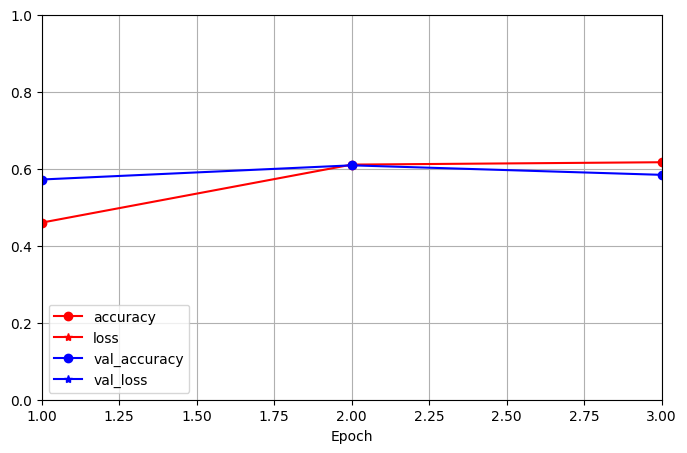

In [12]:
import matplotlib.pyplot as plt
import numpy as np

def plot_learning_curves(history):
    plt.figure(figsize=(8, 5))

    for key, style in zip(history.history, ["r-o","r-*","b-o","b-*"]):
        epochs = np.array(history.epoch)
        plt.plot(epochs + 1, history.history[key], style, label=key)
    plt.xlabel("Epoch")
    plt.axis([1,len(history.history["loss"]), 0., 1])
    plt.legend(loc="lower left")
    plt.grid()

plot_learning_curves(history)

## 1.6  Evaluate the Model
1. Use the [`evaluate()`](https://keras.io/guides/training_with_built_in_methods/) method to evaluate the model on the test set.
   * What is the performance of the model on the test set? `[1.2265034914016724, 0.6013000011444092]`

In [13]:
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5876 - loss: 1.6406
test loss, test acc: [1.640640377998352, 0.5875999927520752]


2. Write a function with the following signature:

In [14]:
def get_prediction(model, X, keepdims=False):
    """
    Args:
        model (keras.Model): a keras model
        X (np.ndarray): input data
        keepdims (bool, optional): If True, the output tensor has rank 2, otherwise rank 1
    Returns: the predications for X either as (batch_size,) or (batch_size, 1)
    """
    # My code here
    preds = model.predict(X)
    return preds.argmax(axis=1,keepdims=keepdims)

3. Use the method above to check the accuracy of the model on the validation set by comparing the output of this method to `y_valid`.
   * You should recognize this number from the output produced by the `fit()` method

In [15]:
from sklearn.metrics import accuracy_score

prediction = get_prediction(model, x_val, keepdims=True)
print("Prediction shape: ", prediction.shape)
print("Prediction: ")
print(prediction[:10])
print("Validation: ")
print(y_val[:10])


acc = accuracy_score(y_val, prediction)
print("Validation accuracy:", acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Prediction shape:  (10000, 1)
Prediction: 
[[1]
 [8]
 [5]
 [1]
 [5]
 [7]
 [4]
 [7]
 [1]
 [2]]
Validation: 
[[1]
 [8]
 [5]
 [1]
 [5]
 [7]
 [4]
 [3]
 [8]
 [2]]
Validation accuracy: 0.5841


4. Write a function that identifies incorrectly classified images:

In [16]:
def get_incorrectly_predicted_images(model, X, y_true):
    """
    model: the trained model
    X: tensor of shape (n,image_shape), the images
    y_true: actual labels (n,1) (or(n,))
    Returns: three tensors of shape(m,image_shape),(m,),(m,)
                incorrectly_classified_images, predicted_labels, expected_labels
    """
    #YOUR CODE HER
    #? Flatten y_true to ensure it is `1D`
    print("y_true shape before flatten: ", y_true.shape)
    y_true = y_true.flatten()
    print("y_true shape after flatten: ", y_true.shape)
    #? Get predictions
    y_preds = get_prediction(model, X, keepdims=False)
    incorrect_idx = np.where(y_preds != y_true)[0]
    return X[incorrect_idx], y_preds[incorrect_idx], y_true[incorrect_idx]

5. Apply the above function to the test set and plot a 5 by 5 grid showing 25 wrongly classified images. Show both the predicted and the actual classabove each image

In [17]:
wrong_images = get_incorrectly_predicted_images(model,X_test,y_test)
print("Number of incorrectly classified images: ", wrong_images[0].shape[0])

y_true shape before flatten:  (10000, 1)
y_true shape after flatten:  (10000,)
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Number of incorrectly classified images:  4124


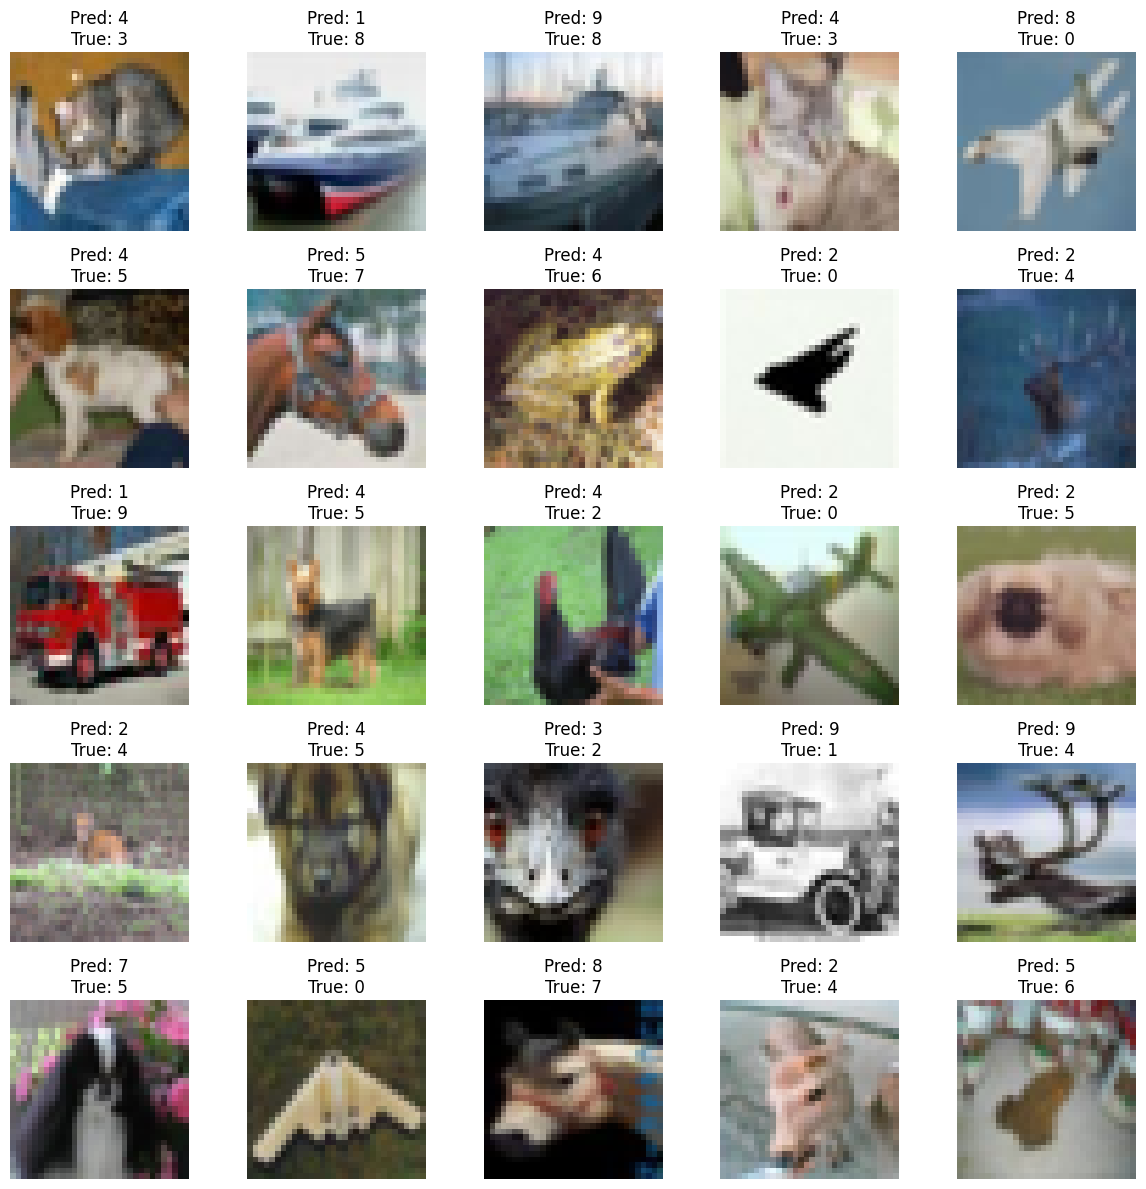

In [18]:

#? First 25 wrongly classified images
images = wrong_images[0][:25]
preds = wrong_images[1][:25]
true = wrong_images[2][:25]

fig, axes = plt.subplots(5, 5, figsize=(12, 12))
axes = axes.flatten()

for i in range(25):
    ax = axes[i]
    ax.imshow(images[i])
    ax.set_title(f"Pred: {preds[i]}\nTrue: {true[i]}")
    ax.axis('off')

plt.tight_layout()
plt.show()

6. Finally, use a tensorflow method to create a confusion matrix for the test set. The rows should contain the actual classes, the columns are the predicted classes. Use the code below to display [the confusion matrix](https://www.tensorflow.org/api_docs/python/tf/math/confusion_matrix).

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


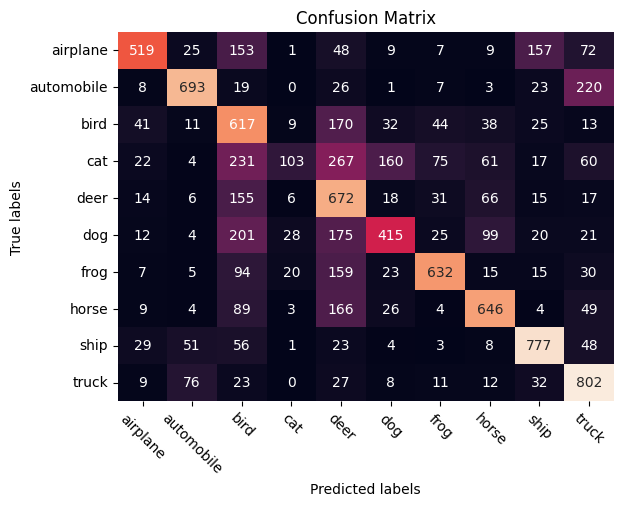

In [19]:
import seaborn as sns
import tensorflow as tf

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

cm = tf.math.confusion_matrix(
    y_test,
    get_prediction(model, X_test, keepdims=False),
    num_classes=None,
    weights=None,
    dtype=tf.dtypes.int32,
    name=None
)
ax = plt.subplot()
#* annot=True to annotate cells, ftm="g" to disable scientific notation
sns.heatmap(cm, annot=True, fmt="g", ax=ax, cbar=False);

#* labels, title and ticks
ax.set_xlabel("Predicted labels");
ax.set_ylabel("True labels");
ax.set_title("Confusion Matrix");
ax.xaxis.set_ticklabels(class_names, rotation=-45);
ax.yaxis.set_ticklabels(class_names, rotation=0);

## 1.7  Try to Improve the Model
Try to improve the model (i.e. try to achieve a higher accuracy). Things you could try:
- Add an additional convolutional block.
- Add dropout to the network to prevent overfitting. See Chapter 11.
- Try different initialization of the weights.
- Try to continue the training with a decreased learning rate.
- Use Monte Carlo dropout to make predictions.
- ...

# 2  Practicing with the Functional API and the Layerclass
## 2.1  Implementing a Residual Unit
On page 515 of the book you can see an implementation of theResidualUnitclass, which is a core component of the ResNet architecture. In the book a classis created which is a subclass of thekeras.layers.Layerclass. For your con-venience, this code is reproduced in Figure1. Note thatLayeris subclassed andnotModel, because our intention is to use the class as part of a larger model.

### 2.1.1  Rewrite ResidualUnit as a Method using the Functional API

In [20]:
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3,
                        strides=1,
                        padding="same",
                        kernel_initializer="he_normal",
                        use_bias=False)

def residual_unit(input_, filters, strides=1, activation="relu"):
    activation_layer = keras.activations.get(activation)

    temp_out = input_
    main = DefaultConv2D(filters,strides=strides)(input_)

    main = keras.layers.BatchNormalization()(main)
    main = activation_layer(main)
    main = DefaultConv2D(filters)(main)
    main = keras.layers.BatchNormalization()(main)

    skip = temp_out
    if strides >= 2:
        skip = DefaultConv2D(filters,kernel_size=1,strides=strides)(input_)
        skip = keras.layers.BatchNormalization()(skip)

    return activation_layer(main + skip)

This method should do exactly the same as the (call method of the) ResidualUnitclass. Check that the code indeed behaves identically by completing the code in Figure

### 2.1.2  Write a method that returns a Model.
Complete the following method, which performs (once more) the same computation as the ResidualUnitclass but wraps this computation inside a model

In [21]:
from functools import partial
#* Partial functie geeft een object terug waar je zelf nog parameters aan kan toevoegen
DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3,
                        strides=1,
                        padding="same",
                        kernel_initializer="he_normal",
                        use_bias=False)
conv1 = DefaultConv2D(filters=32)
#* Zonder partial moet je alles zelf meegeven
conv2 = keras.layers.Conv2D(filters=32, kernel_size=3)

print(conv1.padding)
print(conv2.padding)
class ResidualUnit(keras.layers.Layer):
    def __init__(self, filters, strides=1, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.activation = keras.activations.get(activation)
        self.main_layers = [DefaultConv2D(filters, strides=strides),keras.layers.BatchNormalization(),
        self.activation,DefaultConv2D(filters),keras.layers.BatchNormalization()
        ]
        self.skip_layers = []
        if strides > 1:
            self.skip_layers = [
                DefaultConv2D(filters, kernel_size=1, strides=strides),
                keras.layers.BatchNormalization()
                ]

    def call(self, inputs):
        Z = inputs
        for layer in self.main_layers:
            Z = layer(Z)
        skip_Z = inputs
        for layer in self.skip_layers:
            skip_Z = layer(skip_Z)
        return self.activation(Z + skip_Z)

same
valid


In [22]:
model = keras.Sequential()
model.add(keras.Input(shape=(300,300,3)))
model.add(keras.layers.Conv2D(filters=64,
                          kernel_size=7))

model.add(ResidualUnit(filters=64))
model.add(keras.layers.Flatten())
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 294, 294, 64)   │         9,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ residual_unit (ResidualUnit)    │ (None, 294, 294, 64)   │        74,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 5531904)        │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 83,712 (327.00 KB)

 Trainable params: 83,456 (326.00 KB)

 Non-trainable params: 256 (1.00 KB)

In [23]:
import numpy as np

test_shape = np.ones(shape=(1,300,300,50))
test_shape.shape

(1, 300, 300, 50)

In [24]:
# test_shape[:5][:5]
test_tensor = keras.ops.array(test_shape)

In [25]:
ru = ResidualUnit(filters=64)
#* We callen onze residual unit op het test tensor
output = ResidualUnit(filters=64,strides=1)
# print("Output shape: ", output(test_tensor).shape)

#! Blijft (1, 300, 300, 64) zoals verwacht, omdat we geen convolutie doen met stride>1

In [26]:
residual_unit(test_tensor,filters=50,strides=2).shape

TensorShape([1, 150, 150, 50])

In [27]:
TEST_SHAPE = (128,128,50)
model1 = keras.Sequential([
    keras.layers.Input(shape=TEST_SHAPE),
    ResidualUnit(filters=50)
])

In [29]:
input_ = keras.layers.Input(shape=TEST_SHAPE)
output_ = ResidualUnit(filters=50)(input_)
model2 = keras.Model(inputs=input_, outputs=output_)

In [32]:
x = tf.random.normal(shape=(1, *TEST_SHAPE))

In [34]:
output_model1 = model1(x)
output_model2 = model2(x)
# keras.ops.isclose(output_model1, output_model2)
keras.ops.all(keras.ops.isclose(output_model1, output_model2))

<tf.Tensor: shape=(), dtype=bool, numpy=False>

In [40]:

#? Copy weights from second model to first
model1.set_weights(model2.get_weights())

In [37]:
model1.layers[0]

<ResidualUnit name=residual_unit_3, built=True>

In [38]:
model2.layers[1]

<ResidualUnit name=residual_unit_4, built=True>

In [ ]:
output_model1 = model1(x)
output_model2 = model2(x)
# keras.ops.isclose(output_model1, output_model2)
keras.ops.all(keras.ops.isclose(output_model1, output_model2))
#* Gives True as expected

<tf.Tensor: shape=(), dtype=bool, numpy=True>